In [1]:
import gym
import gym_example
from utils import *

# Training protagonist and adversary

To train adversarial v-3, which includes training of the protagonist to compute reward -later it will be regret, when we include both protagonist and antagonist-. For each environment generated by the adversary we can visualize how it looks, shortest path between agent and goal, and the cumulative reward achieved by the protagonist.

### Without running ray

Shortest path:  12


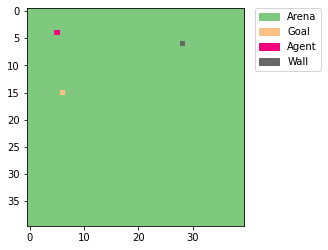

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Sum reward:  -0.9999999310821296


In [2]:
env = gym.make("adversarial-v3")
sum_reward = run_one_episode(env)
print('Sum reward: ', sum_reward)

Shortest path:  9


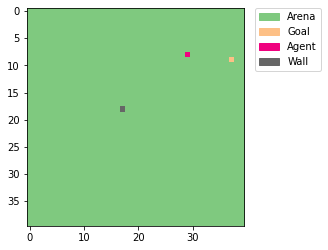

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.611571357020044  Episode Length:  234.2619047619048
Steps:  20000  Cumulative reward:  -0.611571357020044  Episode Length:  234.2619047619048
Steps:  20000  Cumulative reward:  -0.611571357020044  Episode Length:  234.2619047619048
Sum reward:  -0.611571357020044


In [3]:
sum_reward = run_one_episode(env)
print('Sum reward: ', sum_reward)

## Running ray 

In [1]:
import os
import shutil

chkpt_root = "tmp/w_protagonist_0"

shutil.rmtree(chkpt_root, ignore_errors=True, onerror=None)
ray_results = "{}/ray_results/".format(os.getenv("HOME"))
shutil.rmtree(ray_results, ignore_errors=True, onerror=None)

In [2]:
import ray

ray.init(ignore_reinit_error=True, local_mode=True)

2021-04-03 09:42:43,267	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8266


{'node_ip_address': '192.168.1.48',
 'raylet_ip_address': '192.168.1.48',
 'redis_address': '192.168.1.48:62838',
 'object_store_address': '/tmp/ray/session_2021-04-03_09-42-42_683268_83827/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-04-03_09-42-42_683268_83827/sockets/raylet',
 'webui_url': '127.0.0.1:8266',
 'session_dir': '/tmp/ray/session_2021-04-03_09-42-42_683268_83827',
 'metrics_export_port': 61815,
 'node_id': '86405964d3fa47b485c6defedb83f47685e963006cdd3ecd6d6200c6'}

In [3]:
from ray.tune.registry import register_env
from gym_example.envs.adversarial_v3 import Adversarial_v3
import ray.rllib.agents.ppo as ppo

select_env = "adversarial-v3"
register_env(select_env, lambda config: Adversarial_v3())

config = ppo.DEFAULT_CONFIG.copy()

config["log_level"] = "WARN"
agent = ppo.PPOTrainer(config, env=select_env)

2021-04-03 09:43:15,856	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-04-03 09:43:15,856	INFO trainer.py:643 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-04-03 09:43:15,927	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-04-03 09:43:16,858	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-04-03 09:43:17,841	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-04-03 09:43:20,677	WARNING util.py:47 -- Install gputil for GPU system monitoring.


Shortest path:  15


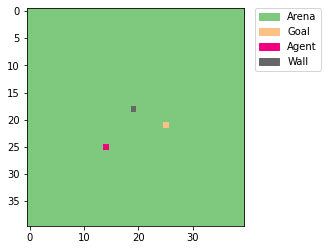

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  24


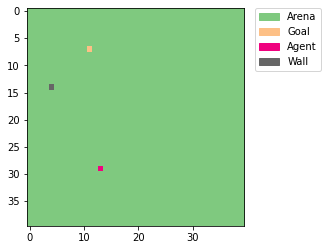

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.757560908487748  Episode Length:  236.3658536585366
Steps:  20000  Cumulative reward:  -0.757560908487748  Episode Length:  236.3658536585366
Steps:  20000  Cumulative reward:  -0.757560908487748  Episode Length:  236.3658536585366
Shortest path:  30


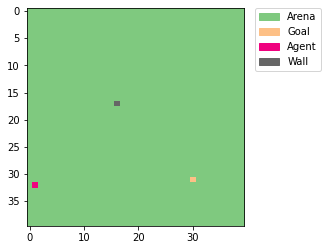

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  30000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  30000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  30000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  11


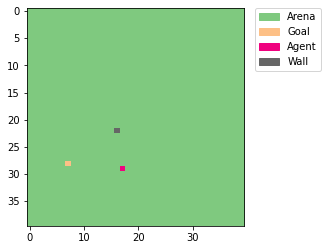

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  40000  Cumulative reward:  -0.3043829135279706  Episode Length:  212.82978723404256
Steps:  40000  Cumulative reward:  -0.3043829135279706  Episode Length:  212.82978723404256
Steps:  40000  Cumulative reward:  -0.3043829135279706  Episode Length:  212.82978723404256
Shortest path:  8


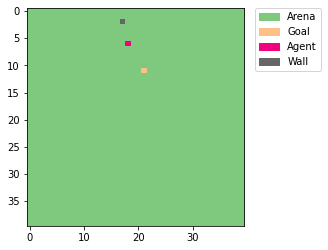

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  50000  Cumulative reward:  -0.5052557468176061  Episode Length:  229.4418604651163
Steps:  50000  Cumulative reward:  -0.5052557468176061  Episode Length:  229.4418604651163
Steps:  50000  Cumulative reward:  -0.5052557468176061  Episode Length:  229.4418604651163
Shortest path:  41


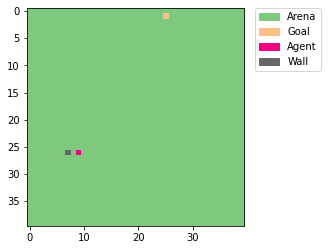

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  60000  Cumulative reward:  -0.8649755445218122  Episode Length:  238.97560975609755
Steps:  60000  Cumulative reward:  -0.8649755445218122  Episode Length:  238.97560975609755
Steps:  60000  Cumulative reward:  -0.8649755445218122  Episode Length:  238.97560975609755
Shortest path:  37


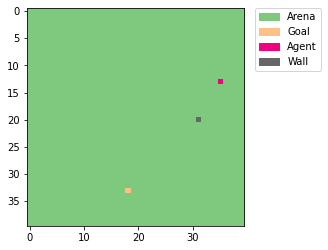

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  70000  Cumulative reward:  -0.9438499314477669  Episode Length:  246.6
Steps:  70000  Cumulative reward:  -0.9438499314477669  Episode Length:  246.6
Steps:  70000  Cumulative reward:  -0.9438499314477669  Episode Length:  246.6
Shortest path:  24


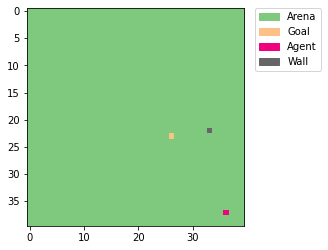

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  80000  Cumulative reward:  0.243801226614762  Episode Length:  174.31578947368422
Steps:  80000  Cumulative reward:  0.243801226614762  Episode Length:  174.31578947368422
Steps:  80000  Cumulative reward:  0.243801226614762  Episode Length:  174.31578947368422
Shortest path:  23


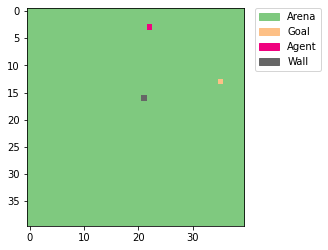

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  90000  Cumulative reward:  -0.5841362992333333  Episode Length:  224.02272727272728
Steps:  90000  Cumulative reward:  -0.5841362992333333  Episode Length:  224.02272727272728
Steps:  90000  Cumulative reward:  -0.5841362992333333  Episode Length:  224.02272727272728
Shortest path:  13


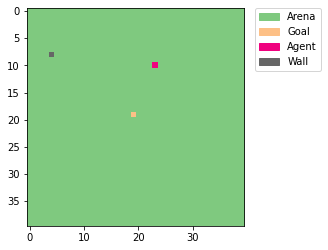

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  100000  Cumulative reward:  -0.8330499326868448  Episode Length:  244.1
Steps:  100000  Cumulative reward:  -0.8330499326868448  Episode Length:  244.1
Steps:  100000  Cumulative reward:  -0.8330499326868448  Episode Length:  244.1
Shortest path:  19


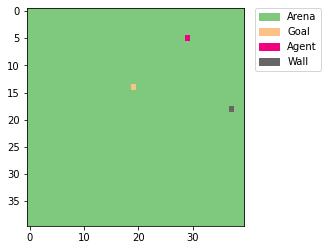

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  110000  Cumulative reward:  -0.6624761200288222  Episode Length:  235.2619047619048
Steps:  110000  Cumulative reward:  -0.6624761200288222  Episode Length:  235.2619047619048
Steps:  110000  Cumulative reward:  -0.6624761200288222  Episode Length:  235.2619047619048
Shortest path:  29


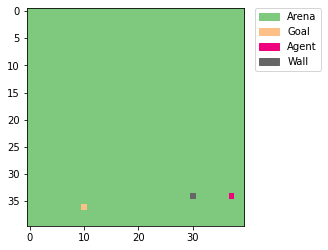

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  120000  Cumulative reward:  -0.7947999304742552  Episode Length:  246.825
Steps:  120000  Cumulative reward:  -0.7947999304742552  Episode Length:  246.825
Steps:  120000  Cumulative reward:  -0.7947999304742552  Episode Length:  246.825
Shortest path:  14


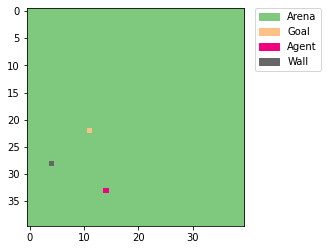

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  130000  Cumulative reward:  -0.0475237454164165  Episode Length:  204.0612244897959
Steps:  130000  Cumulative reward:  -0.0475237454164165  Episode Length:  204.0612244897959
Steps:  130000  Cumulative reward:  -0.0475237454164165  Episode Length:  204.0612244897959
Shortest path:  33


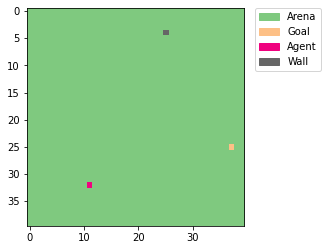

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  140000  Cumulative reward:  -0.4084696241030046  Episode Length:  225.4318181818182
Steps:  140000  Cumulative reward:  -0.4084696241030046  Episode Length:  225.4318181818182
Steps:  140000  Cumulative reward:  -0.4084696241030046  Episode Length:  225.4318181818182
Shortest path:  12


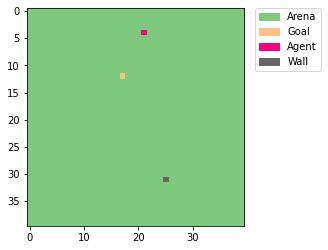

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  150000  Cumulative reward:  -0.4753495190894549  Episode Length:  239.0
Steps:  150000  Cumulative reward:  -0.4753495190894549  Episode Length:  239.0
Steps:  150000  Cumulative reward:  -0.4753495190894549  Episode Length:  239.0
Shortest path:  15


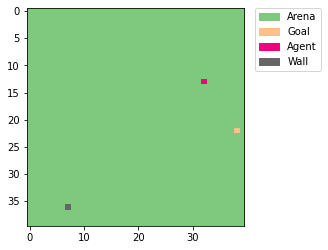

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  160000  Cumulative reward:  -0.3042752950593991  Episode Length:  215.69565217391303
Steps:  160000  Cumulative reward:  -0.3042752950593991  Episode Length:  215.69565217391303
Steps:  160000  Cumulative reward:  -0.3042752950593991  Episode Length:  215.69565217391303
Shortest path:  29


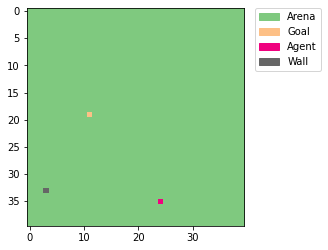

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  170000  Cumulative reward:  0.3689000542003972  Episode Length:  164.55
Steps:  170000  Cumulative reward:  0.3689000542003972  Episode Length:  164.55
Steps:  170000  Cumulative reward:  0.3689000542003972  Episode Length:  164.55
Shortest path:  26


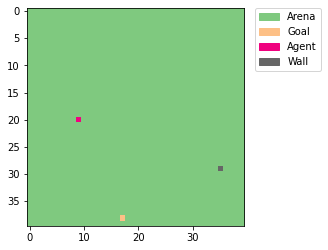

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  180000  Cumulative reward:  -0.6549840598877165  Episode Length:  233.33333333333331
Steps:  180000  Cumulative reward:  -0.6549840598877165  Episode Length:  233.33333333333331
Steps:  180000  Cumulative reward:  -0.6549840598877165  Episode Length:  233.33333333333331
Shortest path:  12


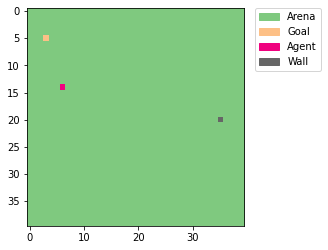

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  190000  Cumulative reward:  1.2581267602826385  Episode Length:  80.88429752066116
Steps:  190000  Cumulative reward:  1.2581267602826385  Episode Length:  80.88429752066116
Steps:  190000  Cumulative reward:  1.2581267602826385  Episode Length:  80.88429752066116
Shortest path:  35


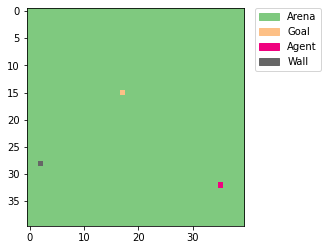

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  200000  Cumulative reward:  -0.0436992878687805  Episode Length:  195.68627450980392
Steps:  200000  Cumulative reward:  -0.0436992878687805  Episode Length:  195.68627450980392
Steps:  200000  Cumulative reward:  -0.0436992878687805  Episode Length:  195.68627450980392
Shortest path:  19


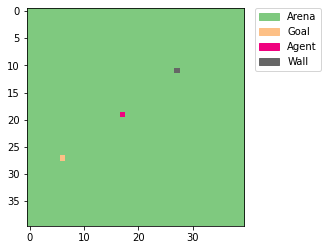

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  210000  Cumulative reward:  -0.4969456697500116  Episode Length:  227.1860465116279
Steps:  210000  Cumulative reward:  -0.4969456697500116  Episode Length:  227.1860465116279
Steps:  210000  Cumulative reward:  -0.4969456697500116  Episode Length:  227.1860465116279
Shortest path:  16


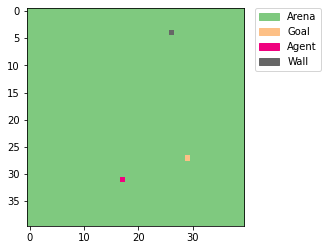

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  220000  Cumulative reward:  -0.2606814071173883  Episode Length:  219.0
Steps:  220000  Cumulative reward:  -0.2606814071173883  Episode Length:  219.0
Steps:  220000  Cumulative reward:  -0.2606814071173883  Episode Length:  219.0
Shortest path:  24


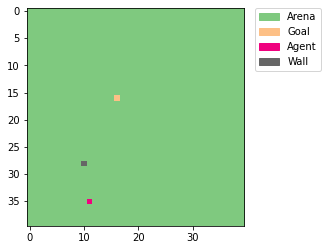

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  230000  Cumulative reward:  -0.0078399379458278  Episode Length:  200.22
Steps:  230000  Cumulative reward:  -0.0078399379458278  Episode Length:  200.22
Steps:  230000  Cumulative reward:  -0.0078399379458278  Episode Length:  200.22
Shortest path:  24


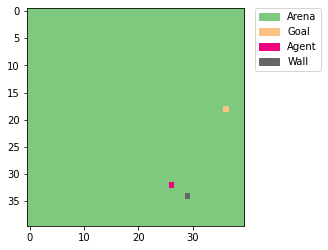

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  240000  Cumulative reward:  0.6312022510129714  Episode Length:  160.31147540983608
Steps:  240000  Cumulative reward:  0.6312022510129714  Episode Length:  160.31147540983608
Steps:  240000  Cumulative reward:  0.6312022510129714  Episode Length:  160.31147540983608
Shortest path:  36


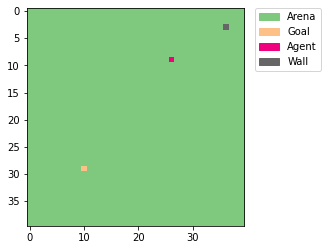

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  250000  Cumulative reward:  -0.6761625319628454  Episode Length:  240.390243902439
Steps:  250000  Cumulative reward:  -0.6761625319628454  Episode Length:  240.390243902439
Steps:  250000  Cumulative reward:  -0.6761625319628454  Episode Length:  240.390243902439
Shortest path:  26


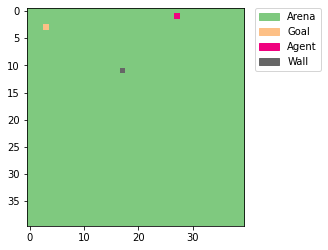

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  260000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  260000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  260000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  18


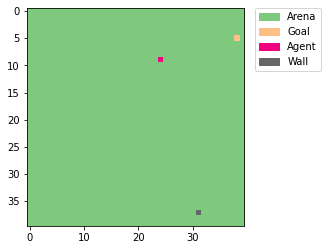

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  270000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  270000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  270000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  33


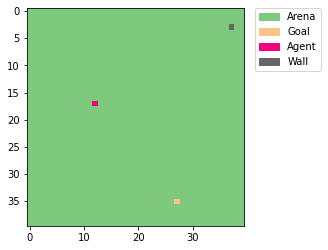

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  280000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  280000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  280000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  24


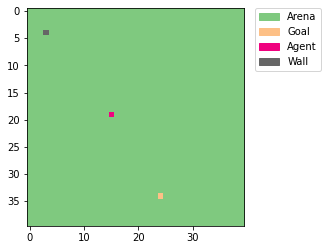

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  290000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  290000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  290000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  35


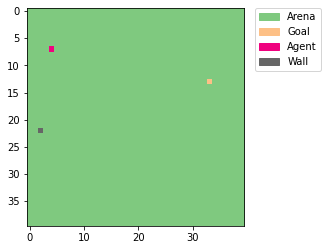

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  300000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  300000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  300000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  36


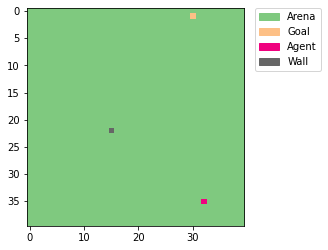

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  310000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  310000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  310000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  4


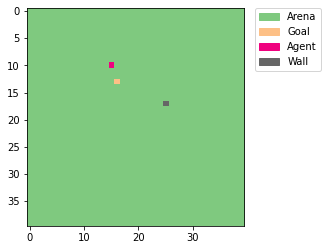

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  320000  Cumulative reward:  0.7466373069567934  Episode Length:  142.88235294117646
Steps:  320000  Cumulative reward:  0.7466373069567934  Episode Length:  142.88235294117646
Steps:  320000  Cumulative reward:  0.7466373069567934  Episode Length:  142.88235294117646
Shortest path:  29


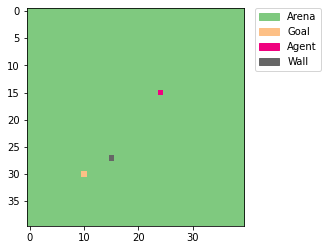

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  330000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  330000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  330000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  15


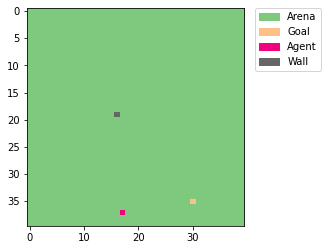

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  340000  Cumulative reward:  -0.7775283850070726  Episode Length:  241.5121951219512
Steps:  340000  Cumulative reward:  -0.7775283850070726  Episode Length:  241.5121951219512
Steps:  340000  Cumulative reward:  -0.7775283850070726  Episode Length:  241.5121951219512
Shortest path:  12


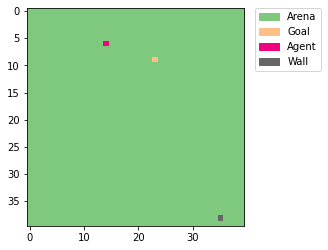

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  350000  Cumulative reward:  -0.7108412016781845  Episode Length:  235.42857142857144
Steps:  350000  Cumulative reward:  -0.7108412016781845  Episode Length:  235.42857142857144
Steps:  350000  Cumulative reward:  -0.7108412016781845  Episode Length:  235.42857142857144
Shortest path:  29


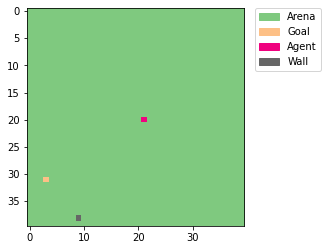

Process Process-36:
Traceback (most recent call last):
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_environment
    side_channels=side_channels,
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai/envs/environment.py", line 66, in __init__
    self.reset(arenas_configurations)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/sit

Shortest path:  30


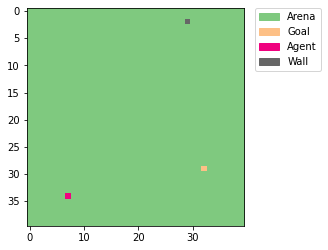

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  37


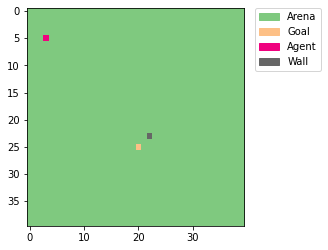

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  41


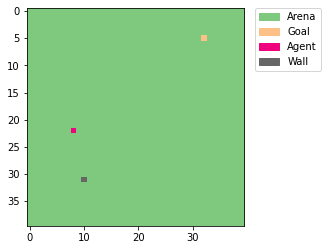

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  30000  Cumulative reward:  -0.9417832649545744  Episode Length:  246.35
Steps:  30000  Cumulative reward:  -0.9417832649545744  Episode Length:  246.35
Steps:  30000  Cumulative reward:  -0.9417832649545744  Episode Length:  246.35
Shortest path:  38


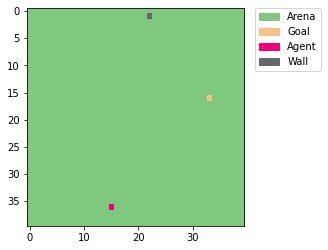

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  40000  Cumulative reward:  -0.7640951709001369  Episode Length:  237.02380952380952
Steps:  40000  Cumulative reward:  -0.7640951709001369  Episode Length:  237.02380952380952
Steps:  40000  Cumulative reward:  -0.7640951709001369  Episode Length:  237.02380952380952
Shortest path:  42


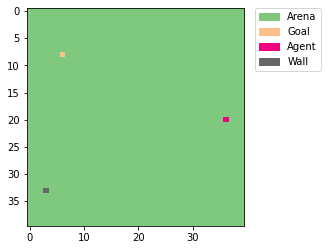

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  50000  Cumulative reward:  -0.6320832620607689  Episode Length:  243.75
Steps:  50000  Cumulative reward:  -0.6320832620607689  Episode Length:  243.75
Steps:  50000  Cumulative reward:  -0.6320832620607689  Episode Length:  243.75
Shortest path:  29


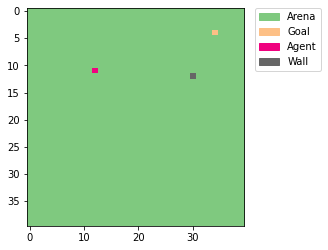

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  60000  Cumulative reward:  -0.9443499314249492  Episode Length:  246.825
Steps:  60000  Cumulative reward:  -0.9443499314249492  Episode Length:  246.825
Steps:  60000  Cumulative reward:  -0.9443499314249492  Episode Length:  246.825
Shortest path:  19


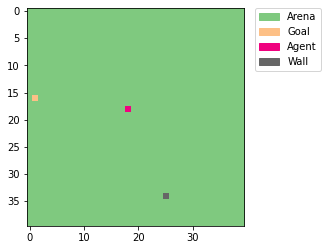

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  70000  Cumulative reward:  -0.3019999323671476  Episode Length:  218.26666666666668
Steps:  70000  Cumulative reward:  -0.3019999323671476  Episode Length:  218.26666666666668
Steps:  70000  Cumulative reward:  -0.3019999323671476  Episode Length:  218.26666666666668
Shortest path:  20


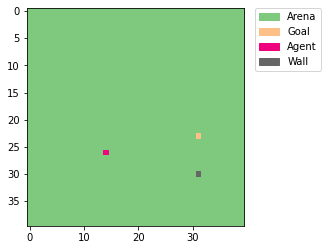

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  80000  Cumulative reward:  0.0125987068037217  Episode Length:  199.1836734693877
Steps:  80000  Cumulative reward:  0.0125987068037217  Episode Length:  199.1836734693877
Steps:  80000  Cumulative reward:  0.0125987068037217  Episode Length:  199.1836734693877
Shortest path:  8


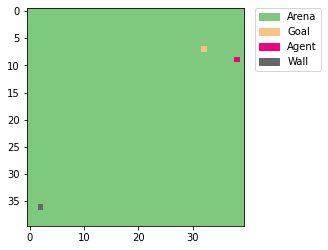

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  90000  Cumulative reward:  1.169099149120099  Episode Length:  89.15315315315316
Steps:  90000  Cumulative reward:  1.169099149120099  Episode Length:  89.15315315315316
Steps:  90000  Cumulative reward:  1.169099149120099  Episode Length:  89.15315315315316
Shortest path:  8


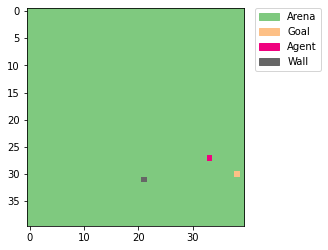

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  100000  Cumulative reward:  -0.8728779781518913  Episode Length:  240.609756097561
Steps:  100000  Cumulative reward:  -0.8728779781518913  Episode Length:  240.609756097561
Steps:  100000  Cumulative reward:  -0.8728779781518913  Episode Length:  240.609756097561
Shortest path:  16


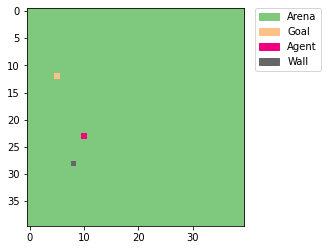

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  110000  Cumulative reward:  -0.5529301624831765  Episode Length:  229.4883720930233
Steps:  110000  Cumulative reward:  -0.5529301624831765  Episode Length:  229.4883720930233
Steps:  110000  Cumulative reward:  -0.5529301624831765  Episode Length:  229.4883720930233
Shortest path:  30


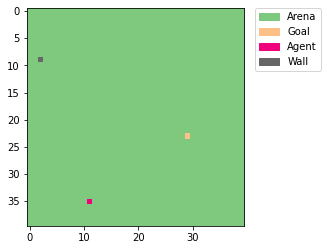

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  120000  Cumulative reward:  -0.1522666026465594  Episode Length:  196.56
Steps:  120000  Cumulative reward:  -0.1522666026465594  Episode Length:  196.56
Steps:  120000  Cumulative reward:  -0.1522666026465594  Episode Length:  196.56
Shortest path:  20


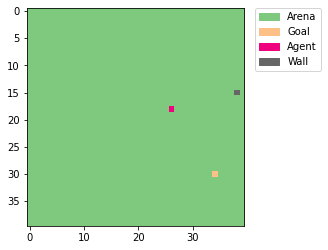

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  130000  Cumulative reward:  -0.7326665971223719  Episode Length:  242.2439024390244
Steps:  130000  Cumulative reward:  -0.7326665971223719  Episode Length:  242.2439024390244
Steps:  130000  Cumulative reward:  -0.7326665971223719  Episode Length:  242.2439024390244
Shortest path:  45


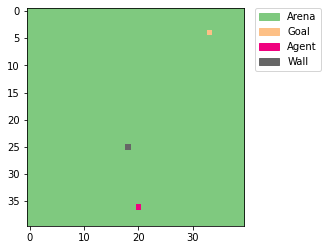

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  140000  Cumulative reward:  -0.1282040197069623  Episode Length:  203.8571428571429
Steps:  140000  Cumulative reward:  -0.1282040197069623  Episode Length:  203.8571428571429
Steps:  140000  Cumulative reward:  -0.1282040197069623  Episode Length:  203.8571428571429
Shortest path:  38


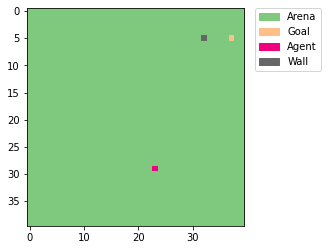

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  150000  Cumulative reward:  -0.523288822784606  Episode Length:  218.0222222222222
Steps:  150000  Cumulative reward:  -0.523288822784606  Episode Length:  218.0222222222222
Steps:  150000  Cumulative reward:  -0.523288822784606  Episode Length:  218.0222222222222
Shortest path:  33


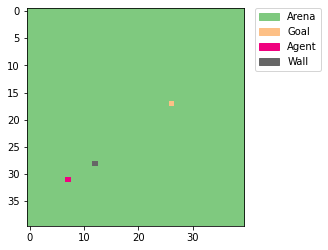

Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  160000  Cumulative reward:  -0.0309466000273823  Episode Length:  196.0
Steps:  160000  Cumulative reward:  -0.0309466000273823  Episode Length:  196.0
Steps:  160000  Cumulative reward:  -0.0309466000273823  Episode Length:  196.0
Shortest path:  44


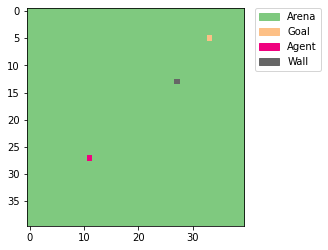

Process Process-53:
Traceback (most recent call last):
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_environment
    side_channels=side_channels,
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai/envs/environment.py", line 66, in __init__
    self.reset(arenas_configurations)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/sit

RayTaskError(ConnectionResetError): [36mray::RolloutWorker.par_iter_next()[39m (pid=83827, ip=192.168.1.48)
  File "python/ray/_raylet.pyx", line 480, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 432, in ray._raylet.execute_task.function_executor
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/util/iter.py", line 1152, in par_iter_next
    return next(self.local_it)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/rollout_worker.py", line 327, in gen_rollouts
    yield self.sample()
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/rollout_worker.py", line 662, in sample
    batches = [self.input_reader.next()]
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/sampler.py", line 95, in next
    batches = [self.get_data()]
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/sampler.py", line 224, in get_data
    item = next(self.rollout_provider)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/sampler.py", line 686, in _env_runner
    base_env.send_actions(actions_to_send)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/env/base_env.py", line 346, in send_actions
    self.vector_env.vector_step(action_vector)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/env/vector_env.py", line 143, in vector_step
    obs, r, done, info = self.envs[i].step(actions[i])
  File "/home/psanchezlopez/Documents/AnimalAI-Olympics/examples/adversary_design/gym_example/envs/adversarial_v3.py", line 119, in step
    load_model=self.load_model)
  File "/home/psanchezlopez/Documents/AnimalAI-Olympics/examples/adversary_design/utils.py", line 183, in train_protagonist
    run_training_aai(0, args)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/run_training_aai.py", line 113, in run_training_aai
    tc.start_learning(env_manager)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/timers.py", line 258, in wrapped
    return func(*args, **kwargs)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/trainer_controller.py", line 201, in start_learning
    self._reset_env(env_manager)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/timers.py", line 258, in wrapped
    return func(*args, **kwargs)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/trainer_controller_aai.py", line 48, in _reset_env
    env.reset(config=new_meta_curriculum_config)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/env_manager.py", line 57, in reset
    self.first_step_infos = self._reset_env(config)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 143, in _reset_env
    ew.previous_step = EnvironmentStep(ew.recv().payload, ew.worker_id, {})
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/subprocess_env_manager.py", line 66, in recv
    response: EnvironmentResponse = self.conn.recv()
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/psanchezlopez/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
ConnectionResetError: [Errno 104] Connection reset by peer

In [4]:
status = "{:2d} reward {:6.2f}/{:6.2f}/{:6.2f} len {:4.2f} saved {}"
n_iter = 3
for n in range(n_iter):
    result = agent.train()
    chkpt_file = agent.save(chkpt_root)
    print(status.format(
            n + 1,
            result["episode_reward_min"],
            result["episode_reward_mean"],
            result["episode_reward_max"],
            result["episode_len_mean"],
            chkpt_file
            ))